# Relationship between COVID-19 Mortality Rates & Obesity Percentage  

Introduction:

In this notebook, I used data from food intake by countries along with mortality data associated with COVID-19.  

Data for this project is taken from Kaggle dataset. Written by the owner of the dataset:

"In this dataset, I have combined data of different types of food, world population obesity and undernourished rate, and global COVID-19 cases count from around the world in order to learn more about how a healthy eating style could help combat COVID-19. And from the dataset, we can gather information regarding diet patterns from countries with lower COVID infection rate, and adjust our own diet accordingly."


Five Files in the Kaggle dataset:

-Fat_Supply_Quantity_Data.csv: percentage of fat intake from different food groups for 170 different countries.

-Food_Supply_Quantity_kg_Data.csv: percentage of food intake( in  𝑘𝑔  ) from different food groups for 170 different countries.

-Food_Supply_kcal_Data.csv: percentage of energy intake (in  𝑘𝑐𝑎𝑙 ) from different food groups for 170 different countries.

-Protein_Supply_Quantity_Data.csv: percentage of protein intake from different food groups for 170 different countries.

-Supply_Food_Data_Descriptions.csv: This dataset is obtained from FAO.org, and is used to show the specific types of food that belongs to each category for the above datasets.

All of these files have obesity, undernourishment and COVID-19 cases columns as percentages of the total population.

In [107]:
#import packages 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
np.random.seed(42) #make notebook's output stable each run 

In [108]:
#read in the files
fat_supply_quantity = pd.read_csv('/Users/perrisolhjou/Downloads/Fat_Supply_Quantity_Data.csv')
food_kcal = pd.read_csv('/Users/perrisolhjou/Downloads/Food_Supply_kcal_Data.csv')
food_kg = pd.read_csv('/Users/perrisolhjou/Downloads/Food_Supply_Quantity_kg_Data.csv')
protein_quantity = pd.read_csv('/Users/perrisolhjou/Downloads/Protein_Supply_Quantity_Data.csv') 
supply_food = pd.read_csv('/Users/perrisolhjou/Downloads/Supply_Food_Data_Descriptions.csv')


In [109]:
# Define features and labels
feature_names = ['animal_products', 'cereals_excluding_beer', 'obesity', 'vegetal_products']
label_name = 'deaths'

# Exploratory Data Analysis (EDA)

In [110]:
#showing the first five rows and columns of the dataset
fat_supply_quantity.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.057435,0.001316,0.049566,0.006552,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.187755,0.006122,0.159184,0.022449,98000.0,%


In [111]:
food_kcal.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.057435,0.001316,0.049566,0.006552,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.187755,0.006122,0.159184,0.022449,98000.0,%


In [112]:
food_kg.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.057435,0.001316,0.049566,0.006552,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.187755,0.006122,0.159184,0.022449,98000.0,%


In [113]:
protein_quantity.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.057435,0.001316,0.049566,0.006552,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.187755,0.006122,0.159184,0.022449,98000.0,%


In [114]:
supply_food.head()

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."


In [115]:
fat_supply_quantity.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [116]:
fat_supply_quantity.isnull().sum()
#check for missing values in sample (handle null values)

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       6
Deaths                          6
Recovered                       6
Active        

In [117]:
fat_supply_quantity.dropna(inplace=True)
fat_supply_quantity.isnull().sum()
#Identifying null values and dropping the null values

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered                       0
Active        

In [118]:
fat_supply_quantity["Undernourished"]

0      29.8
1       6.2
2       3.9
3        25
5       4.6
       ... 
165    21.2
166     9.3
167    38.9
168    46.7
169    51.3
Name: Undernourished, Length: 154, dtype: object

In [119]:
fat_supply_quantity.shape
#Identifying that we have data only from 154 countries (not the entire selection) (handle sampling )

(154, 32)

In [120]:
#change the indices of the dataframe to match the new parameters of 154 countries
fat_supply_quantity.set_index("Country", inplace=True)

In [121]:
fat_supply_quantity["Undernourished"] = fat_supply_quantity["Undernourished"].replace('<2.5','2.5').astype(float)
fat_supply_quantity.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,0.001142,20.371363,4.156129,0.000497,4.470623,0.947074,0.825396,0.536843,9.075049,0.050782,...,29.628879,18.825103,0.306868,18.449351,11.324026,1.803421,0.034196,1.233397,0.535824,4.796579e+07
std,0.010051,8.027724,3.360236,0.004242,3.248573,0.661384,0.930353,0.856490,4.456419,0.065645,...,8.027314,6.824286,0.205127,9.519483,11.771718,2.101453,0.042874,1.631752,1.195758,1.639258e+08
min,0.000000,5.018200,0.167800,0.000000,0.990800,0.058000,0.031500,0.037300,0.906100,0.000000,...,13.098200,4.954900,0.026300,2.100000,2.500000,0.000312,0.000000,0.000000,0.000000,7.200000e+04
25%,0.000000,14.531900,1.624975,0.000000,2.010925,0.363475,0.320300,0.235125,6.029075,0.009425,...,23.293600,14.029650,0.175725,8.250000,2.500000,0.117206,0.001767,0.076767,0.011678,3.403500e+06
50%,0.000000,20.099700,3.304450,0.000000,3.454750,0.867750,0.567000,0.366000,8.964900,0.028000,...,29.902150,18.363000,0.247050,21.300000,7.050000,0.870542,0.010941,0.426220,0.102078,1.058950e+07
75%,0.000000,26.707425,6.253750,0.000000,5.694575,1.251575,1.021775,0.577800,11.396200,0.067675,...,35.471300,23.697575,0.362925,25.700000,15.075000,2.928611,0.052827,2.144298,0.375804,3.383650e+07
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,...,44.981800,36.418600,1.153800,45.500000,59.600000,8.799035,0.176743,7.223734,7.014216,1.402385e+09


In [122]:
#Identifying that this column is not at all needed
fat_supply_quantity.drop('Unit (all except Population)',axis =1, inplace=True)
fat_supply_quantity.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,0.001142,20.371363,4.156129,0.000497,4.470623,0.947074,0.825396,0.536843,9.075049,0.050782,...,29.628879,18.825103,0.306868,18.449351,11.324026,1.803421,0.034196,1.233397,0.535824,4.796579e+07
std,0.010051,8.027724,3.360236,0.004242,3.248573,0.661384,0.930353,0.856490,4.456419,0.065645,...,8.027314,6.824286,0.205127,9.519483,11.771718,2.101453,0.042874,1.631752,1.195758,1.639258e+08
min,0.000000,5.018200,0.167800,0.000000,0.990800,0.058000,0.031500,0.037300,0.906100,0.000000,...,13.098200,4.954900,0.026300,2.100000,2.500000,0.000312,0.000000,0.000000,0.000000,7.200000e+04
25%,0.000000,14.531900,1.624975,0.000000,2.010925,0.363475,0.320300,0.235125,6.029075,0.009425,...,23.293600,14.029650,0.175725,8.250000,2.500000,0.117206,0.001767,0.076767,0.011678,3.403500e+06
50%,0.000000,20.099700,3.304450,0.000000,3.454750,0.867750,0.567000,0.366000,8.964900,0.028000,...,29.902150,18.363000,0.247050,21.300000,7.050000,0.870542,0.010941,0.426220,0.102078,1.058950e+07
75%,0.000000,26.707425,6.253750,0.000000,5.694575,1.251575,1.021775,0.577800,11.396200,0.067675,...,35.471300,23.697575,0.362925,25.700000,15.075000,2.928611,0.052827,2.144298,0.375804,3.383650e+07
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,...,44.981800,36.418600,1.153800,45.500000,59.600000,8.799035,0.176743,7.223734,7.014216,1.402385e+09


In [123]:
cor = fat_supply_quantity.corr()
#Analyzing correlation matrix to see dietary factors affecting confirmed cases

# Data Visualizations 

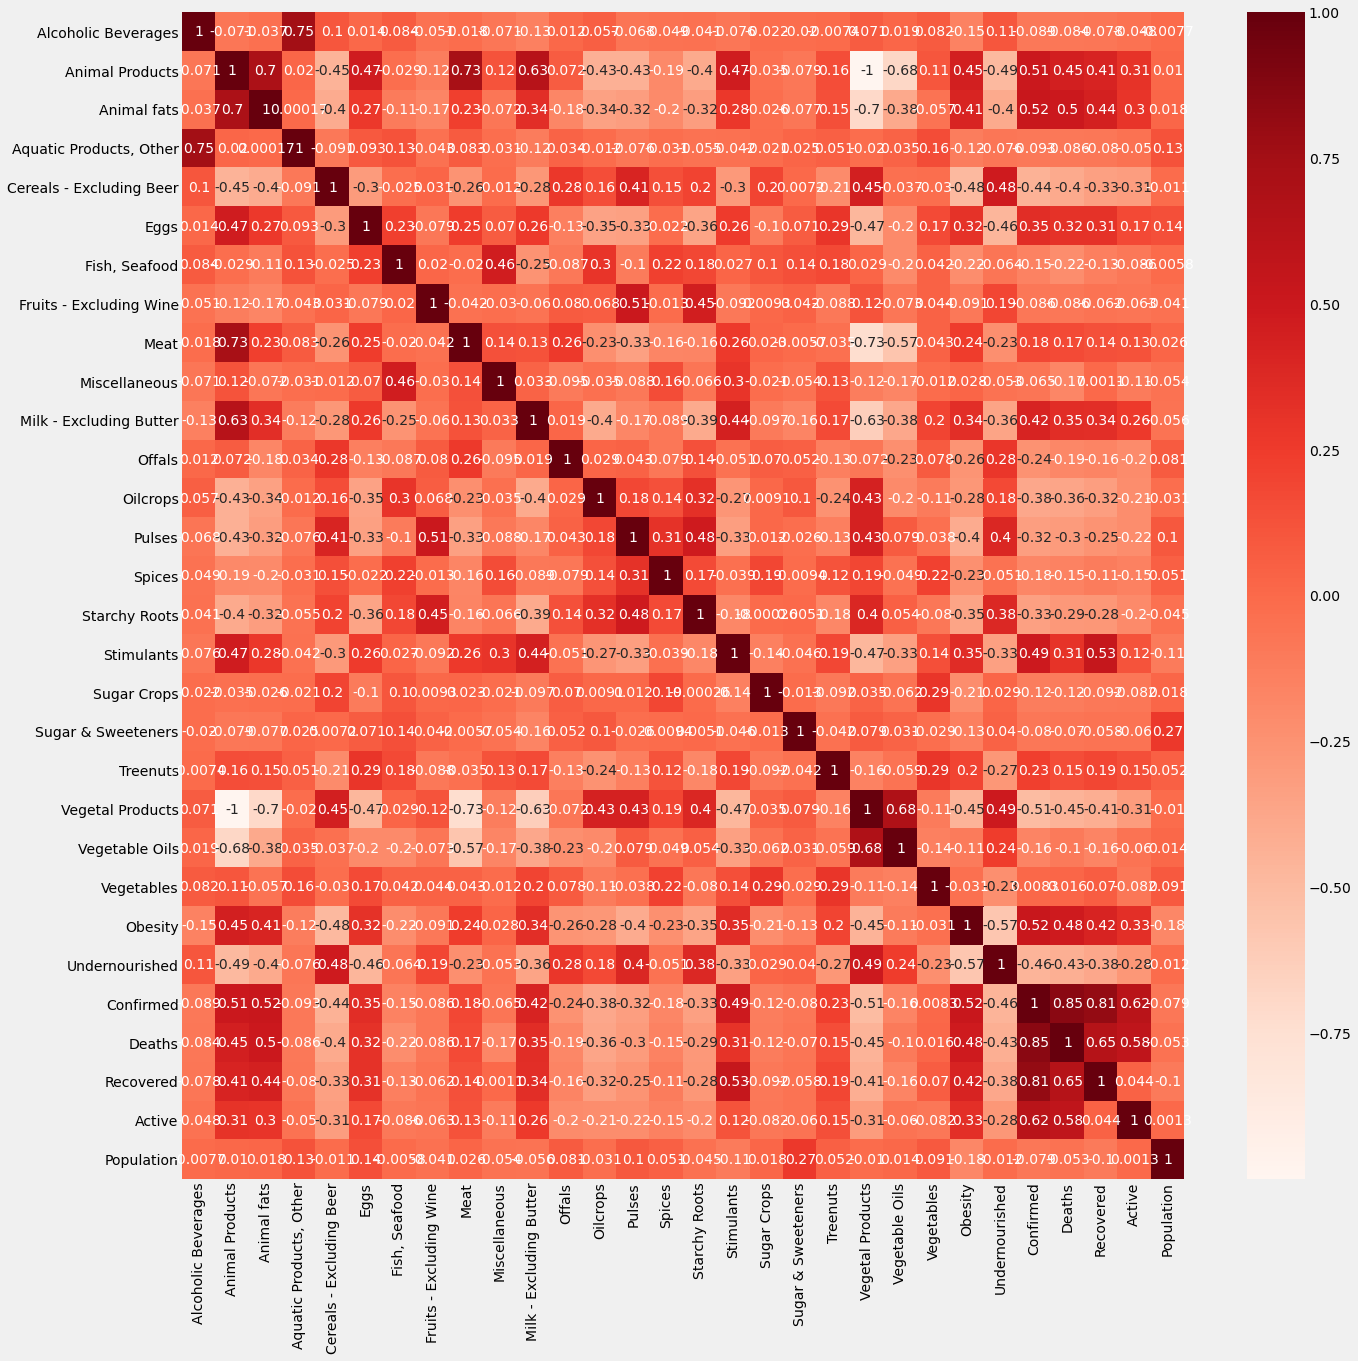

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#visual heatmap to see correlation in dataframe
#assumption: obestity and unhealthy foods = higher mortality rates of COVID-19

In [125]:
cor_target = abs(cor["Confirmed"]).drop(["Confirmed","Deaths","Recovered","Active",]).sort_values(ascending=False)
#Analyzing highly correlated features with confirmed cases
relevant_features = cor_target[cor_target>0.4]
relevant_features

Animal fats                 0.522936
Obesity                     0.522894
Vegetal Products            0.505766
Animal Products             0.505726
Stimulants                  0.485864
Undernourished              0.459009
Cereals - Excluding Beer    0.440963
Milk - Excluding Butter     0.420905
Name: Confirmed, dtype: float64

In [126]:
fat_supply_quantity["Population"].max()

1402385000.0

In [127]:
#Let's look at obesity 
#assumption: obesity leads to death by covid-19
fat_supply_quantity = fat_supply_quantity.sort_values(by="Obesity",ascending=False)
fat_supply_quantity.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,0.0,21.6806,4.7780,0.0036,1.5771,0.2227,1.8968,0.6287,13.2418,0.0683,...,28.3194,8.3345,0.0431,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0
United States of America,0.0,21.2045,3.3013,0.0000,1.2829,1.2500,0.3887,0.4426,9.4166,0.0000,...,28.7970,23.6117,0.1944,37.3,2.5,7.133080,0.118864,0.000000,7.014216,329878000.0
Kuwait,0.0,19.8923,2.1588,0.0000,3.0847,2.3242,0.3732,0.3496,9.5706,0.1086,...,30.1101,21.2150,0.5055,37.0,2.8,3.346067,0.020188,3.204626,0.121253,4691000.0
Saudi Arabia,0.0,15.3954,2.6475,0.0000,5.2126,0.9019,0.4122,0.4219,6.9243,0.0873,...,34.6070,25.4182,0.1891,35.0,7.1,1.040533,0.018016,1.017043,0.005474,35041000.0
Jordan,0.0,12.2622,1.8696,0.0000,3.7391,0.5224,0.3189,0.1980,5.8122,0.0385,...,37.7378,29.0553,0.2694,33.4,12.2,2.929591,0.038590,2.769033,0.121968,10679000.0


In [128]:
cor_target = abs(cor["Confirmed"]).drop(["Confirmed","Deaths","Recovered","Active",]).sort_values(ascending=False)
#Selecting highly correlated features within the correlation matrix
relevant_features = cor_target[cor_target>0.4]
relevant_features
#obesity is highly correlated

Animal fats                 0.522936
Obesity                     0.522894
Vegetal Products            0.505766
Animal Products             0.505726
Stimulants                  0.485864
Undernourished              0.459009
Cereals - Excluding Beer    0.440963
Milk - Excluding Butter     0.420905
Name: Confirmed, dtype: float64

In [129]:
fat_supply_quantity["Population"].max()

1402385000.0

In [130]:
#lets look at obesity within the fat supply file
df_Obesity = fat_supply_quantity.sort_values(by ="Obesity",ascending=False)
df_Obesity.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,0.0,21.6806,4.7780,0.0036,1.5771,0.2227,1.8968,0.6287,13.2418,0.0683,...,28.3194,8.3345,0.0431,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0
United States of America,0.0,21.2045,3.3013,0.0000,1.2829,1.2500,0.3887,0.4426,9.4166,0.0000,...,28.7970,23.6117,0.1944,37.3,2.5,7.133080,0.118864,0.000000,7.014216,329878000.0
Kuwait,0.0,19.8923,2.1588,0.0000,3.0847,2.3242,0.3732,0.3496,9.5706,0.1086,...,30.1101,21.2150,0.5055,37.0,2.8,3.346067,0.020188,3.204626,0.121253,4691000.0
Saudi Arabia,0.0,15.3954,2.6475,0.0000,5.2126,0.9019,0.4122,0.4219,6.9243,0.0873,...,34.6070,25.4182,0.1891,35.0,7.1,1.040533,0.018016,1.017043,0.005474,35041000.0
Jordan,0.0,12.2622,1.8696,0.0000,3.7391,0.5224,0.3189,0.1980,5.8122,0.0385,...,37.7378,29.0553,0.2694,33.4,12.2,2.929591,0.038590,2.769033,0.121968,10679000.0


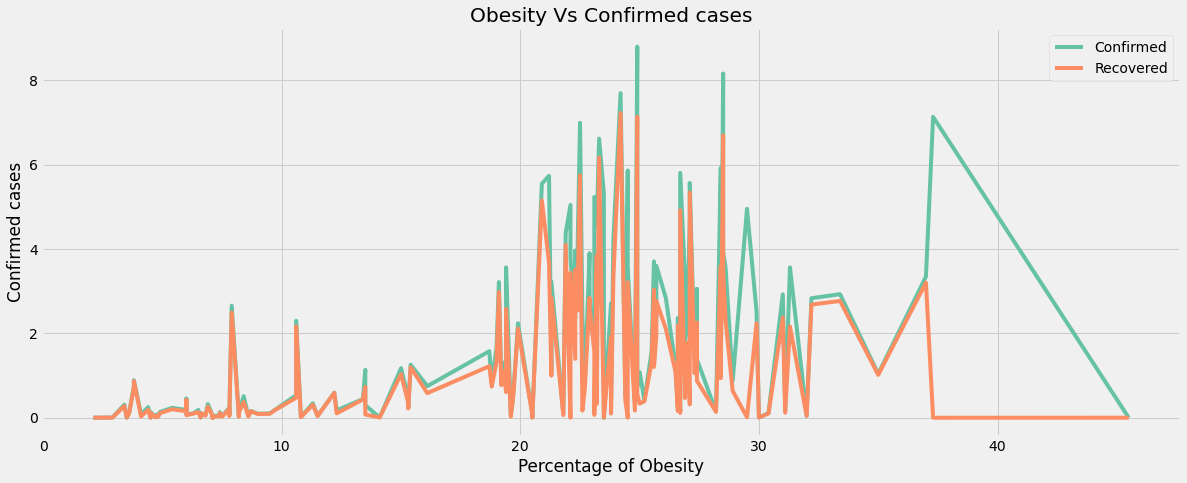

In [131]:
#create a line graph of obesity vs confirmed COVID-19 cases

plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)

plt.plot(df_Obesity["Obesity"],df_Obesity["Confirmed"], label="Confirmed")
plt.plot(df_Obesity["Obesity"],df_Obesity["Recovered"], label="Recovered")

plt.title('Obesity Vs Confirmed cases')
plt.xlabel('Percentage of Obesity')
plt.ylabel('Confirmed cases')
plt.legend(loc='best')

In [132]:
#Looks like there was a spike in Obesity confirmed cases as the percentage of obestiy rises

array([<AxesSubplot:ylabel='mean'>], dtype=object)

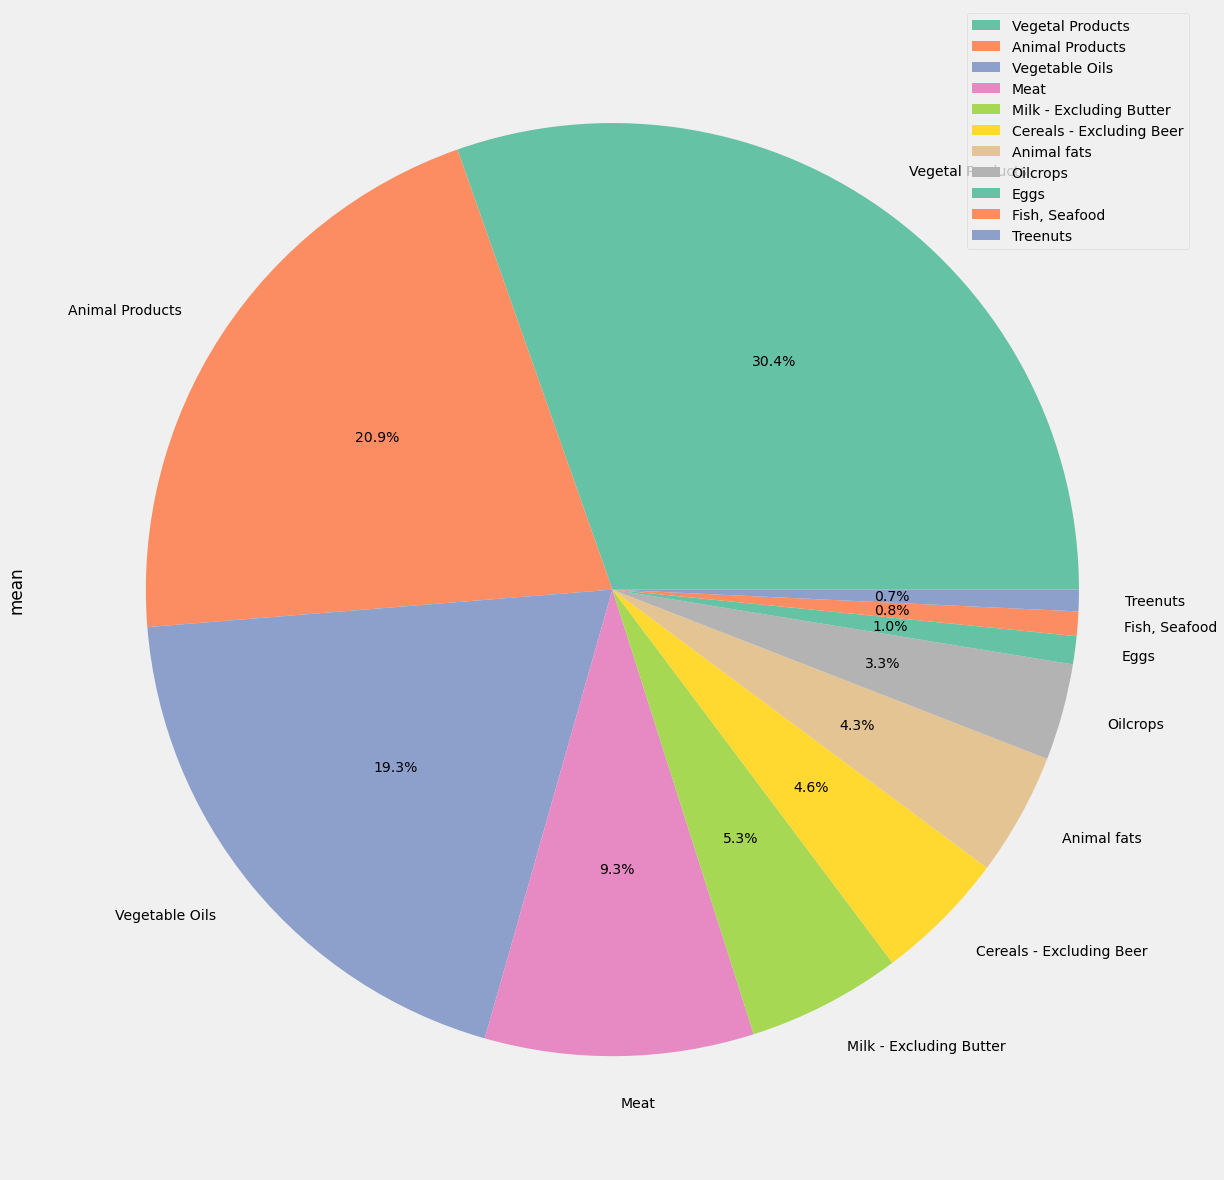

In [133]:
#A look into overall eating of food sources
diet_mean = df_Obesity.describe().iloc[1]
diet_mean = pd.DataFrame(diet_mean).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active'], axis=0)
diet_mean = diet_mean.sort_values(by='mean', ascending=False).iloc[:11]
diet_mean.plot.pie(subplots=True, figsize=(20, 20), autopct='%1.1f%%')

Undernourished people consume much less animal products, and consume much more starchy roots than the world's consumption in average. Moreover, undernourished seem to be consuming a bit more alcoholic beverages.

<AxesSubplot:>

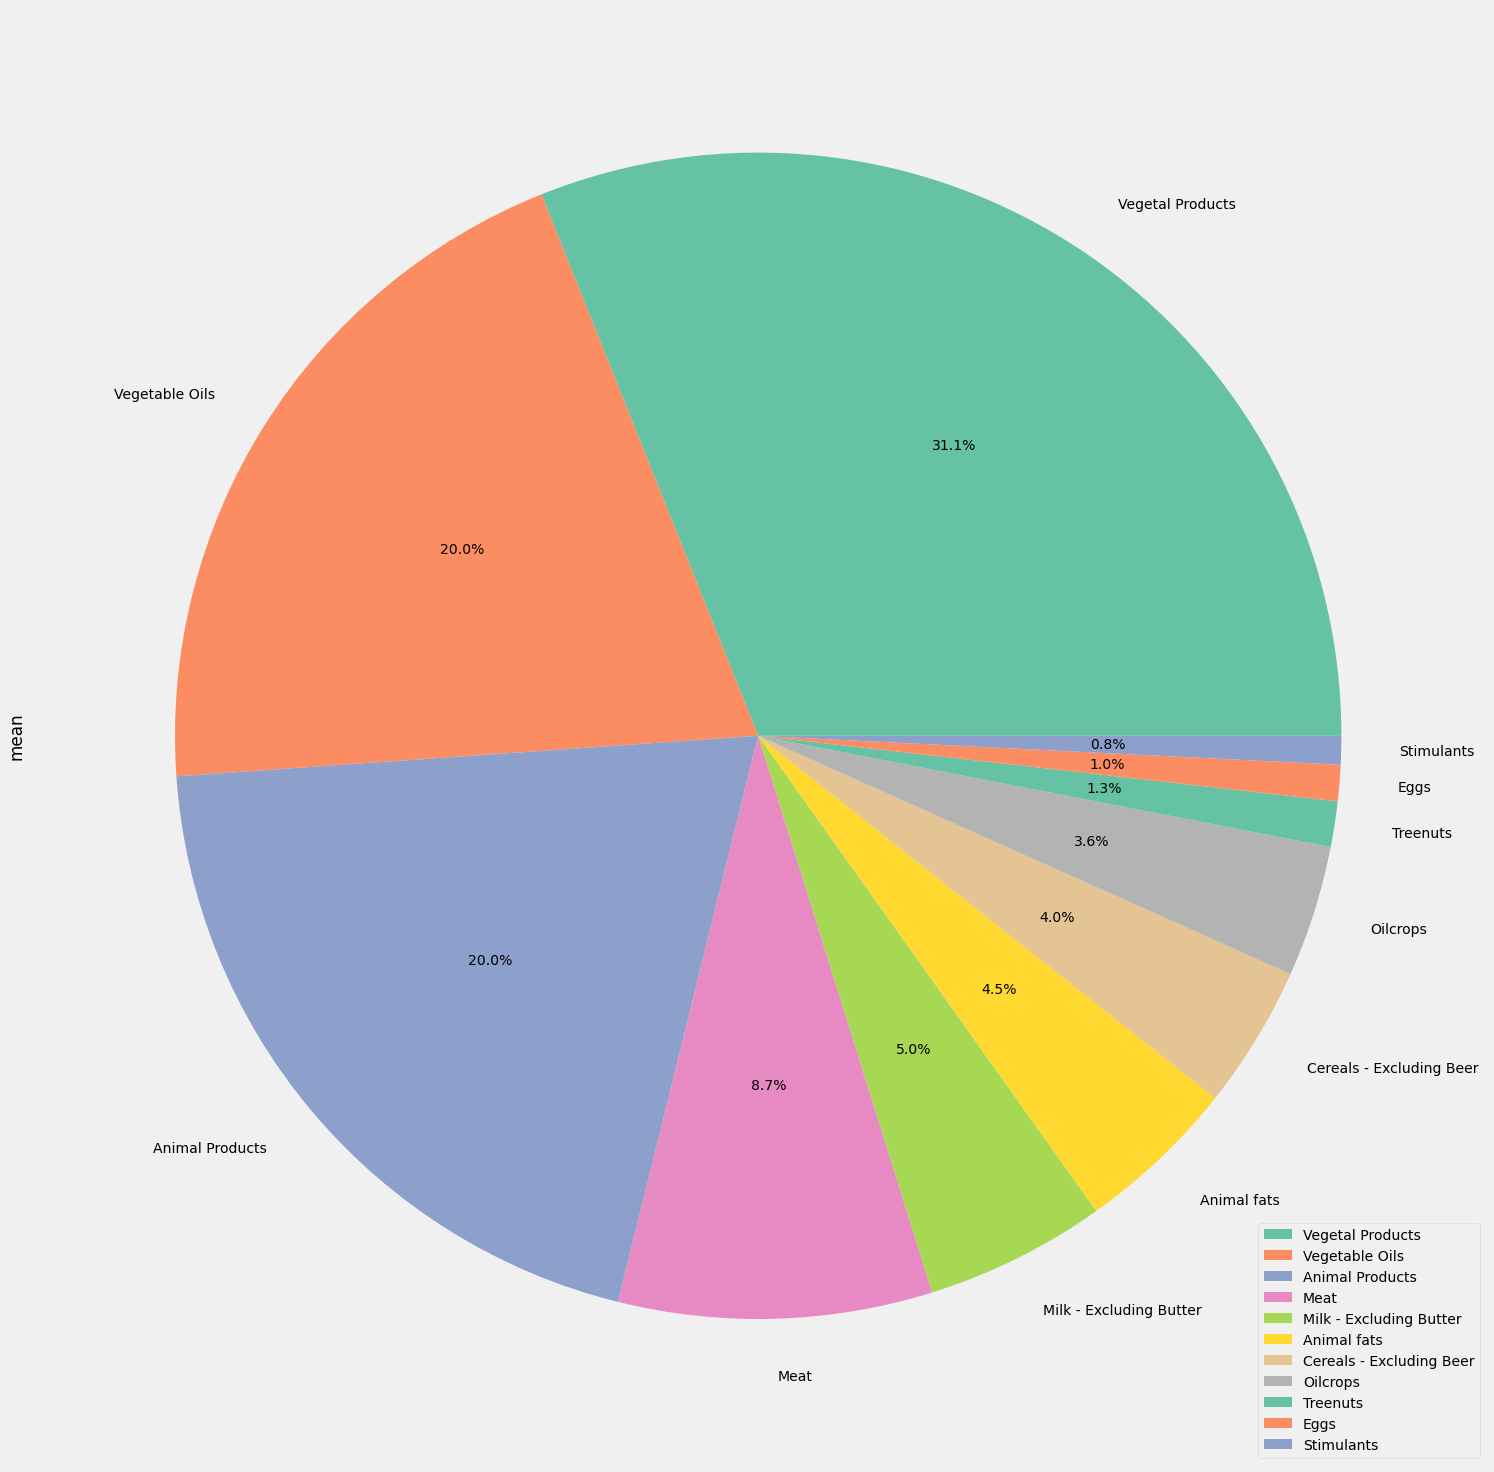

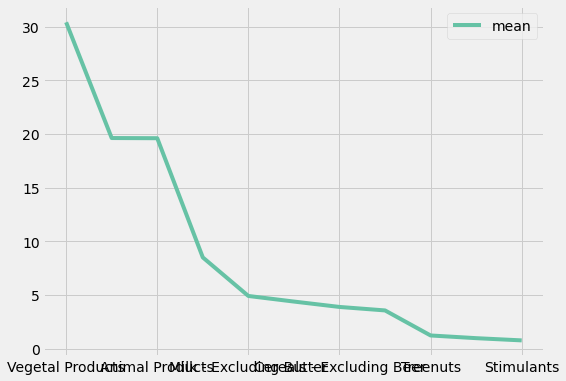

In [134]:
# Obesity average diet in global population
obesity_set = df_Obesity[df_Obesity['Obesity'] == df_Obesity['Obesity']].sort_values(by='Obesity', ascending=False).head(10)
obesity_mean = obesity_set.describe().iloc[1]
obesity_mean = pd.DataFrame(obesity_mean).drop(['Deaths', 'Population','Undernourished','Obesity', 'Recovered', 'Confirmed', 'Active'], axis=0)
obesity_mean = obesity_mean.sort_values(by='mean', ascending=False).iloc[:11]


obesity_mean.plot.pie(subplots=True, figsize=(25, 25), autopct='%1.1f%%')

obesity_mean.plot()

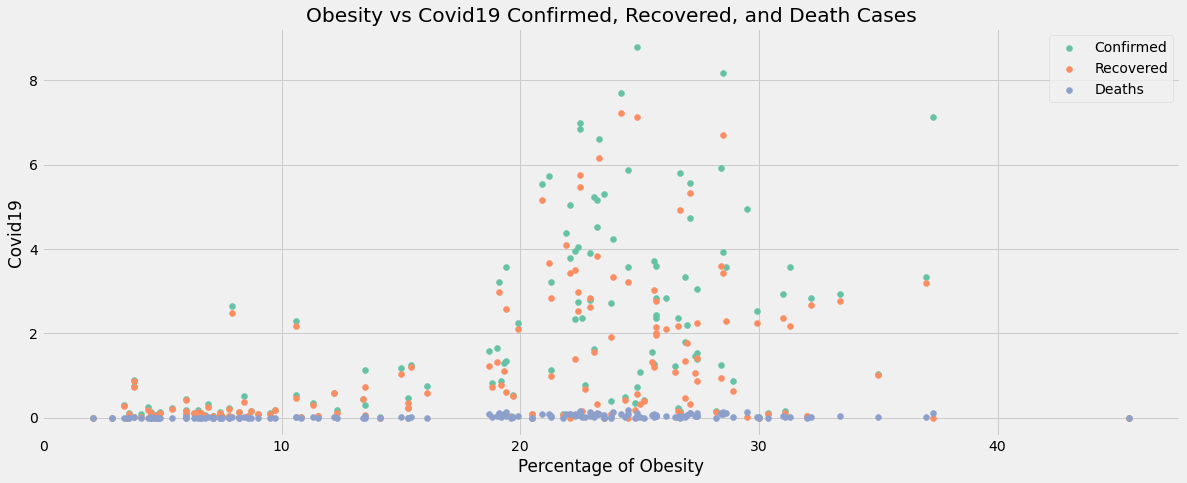

In [135]:


plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.scatter(df_Obesity["Obesity"],df_Obesity["Confirmed"],label="Confirmed")
plt.scatter(df_Obesity["Obesity"],df_Obesity["Recovered"], label="Recovered")
plt.scatter(df_Obesity["Obesity"],df_Obesity["Deaths"], label="Deaths")

plt.title('Obesity vs Covid19 Confirmed, Recovered, and Death Cases')
plt.xlabel('Percentage of Obesity')
plt.ylabel('Covid19')
plt.legend(loc='best')

In [136]:
#We can see the correlation between obesity and cases of COVID-19 from the visualizations

Distribution of food intake (in kg) - exploring high obesity cases
Let's inspect this further. What can we say about the food intake in countries grouped by obesity rate?

In [137]:
df_high_ob = fat_supply_quantity[fat_supply_quantity.Obesity > fat_supply_quantity['Obesity'].mean()]
df_low_ob = fat_supply_quantity[fat_supply_quantity.Obesity <= fat_supply_quantity['Obesity'].mean()]

In [138]:
fat_supply_quantity['ObesityAboveAvg'] = (fat_supply_quantity["Obesity"] > fat_supply_quantity['Obesity'].mean()).astype(int)

We have created a column ObesityAboveAvg that has value 1 if the country has obesity rate above the mean of all other countries, and 0 otherwise.

In [139]:
fat_supply_quantity

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,ObesityAboveAvg
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,0.0,21.6806,4.7780,0.0036,1.5771,0.2227,1.8968,0.6287,13.2418,0.0683,...,8.3345,0.0431,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0,1
United States of America,0.0,21.2045,3.3013,0.0000,1.2829,1.2500,0.3887,0.4426,9.4166,0.0000,...,23.6117,0.1944,37.3,2.5,7.133080,0.118864,0.000000,7.014216,329878000.0,1
Kuwait,0.0,19.8923,2.1588,0.0000,3.0847,2.3242,0.3732,0.3496,9.5706,0.1086,...,21.2150,0.5055,37.0,2.8,3.346067,0.020188,3.204626,0.121253,4691000.0,1
Saudi Arabia,0.0,15.3954,2.6475,0.0000,5.2126,0.9019,0.4122,0.4219,6.9243,0.0873,...,25.4182,0.1891,35.0,7.1,1.040533,0.018016,1.017043,0.005474,35041000.0,1
Jordan,0.0,12.2622,1.8696,0.0000,3.7391,0.5224,0.3189,0.1980,5.8122,0.0385,...,29.0553,0.2694,33.4,12.2,2.929591,0.038590,2.769033,0.121968,10679000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,0.0,11.1691,1.4358,0.0000,11.3929,0.2238,0.0559,0.4102,4.1768,0.0000,...,17.4156,0.1305,3.6,20.6,0.113410,0.001760,0.100446,0.011204,114916000.0,0
Cambodia,0.0,18.8510,0.8839,0.0000,9.4179,0.5639,4.8461,0.2438,11.7799,0.1372,...,11.2313,0.2591,3.5,16.4,0.002813,0.000000,0.002465,0.000348,15497000.0,0
Bangladesh,0.0,9.8365,1.2369,0.0000,6.9946,1.2664,2.1646,0.4270,1.8407,0.0147,...,29.6422,0.3092,3.4,14.7,0.310045,0.004630,0.277443,0.027973,169809000.0,0


In [140]:
#Get correlation matrix

df_Obesity.corr()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
Alcoholic Beverages,1.000000,-0.070871,-0.036746,0.751088,0.103028,0.014224,0.084251,-0.050626,-0.017627,-0.071114,...,0.070872,0.019107,0.082013,-0.154252,0.105441,-0.089457,-0.084296,-0.078047,-0.047687,-0.007711
Animal Products,-0.070871,1.000000,0.697547,0.019938,-0.450856,0.469609,-0.028597,-0.122182,0.727150,0.118110,...,-1.000000,-0.680423,0.106243,0.449033,-0.488053,0.505726,0.448521,0.414216,0.307443,0.010433
Animal fats,-0.036746,0.697547,1.000000,0.000170,-0.399728,0.272433,-0.106917,-0.168040,0.228829,-0.071821,...,-0.697541,-0.383968,-0.056598,0.410688,-0.395764,0.522936,0.497785,0.442089,0.297885,0.017760
"Aquatic Products, Other",0.751088,0.019938,0.000170,1.000000,-0.091117,0.092510,0.128302,-0.042575,0.083026,-0.030819,...,-0.019900,0.035041,0.161518,-0.121690,-0.076027,-0.092503,-0.086172,-0.080140,-0.050116,0.125152
Cereals - Excluding Beer,0.103028,-0.450856,-0.399728,-0.091117,1.000000,-0.304144,-0.025438,0.030985,-0.255698,-0.011784,...,0.450855,-0.037461,-0.030121,-0.484577,0.482489,-0.440963,-0.395688,-0.328238,-0.312850,-0.011456
Eggs,0.014224,0.469609,0.272433,0.092510,-0.304144,1.000000,0.231742,-0.079029,0.247868,0.070388,...,-0.469665,-0.201963,0.170721,0.319066,-0.464595,0.348071,0.320097,0.313251,0.172763,0.143642
"Fish, Seafood",0.084251,-0.028597,-0.106917,0.128302,-0.025438,0.231742,1.000000,0.019655,-0.019544,0.461753,...,0.028547,-0.201150,0.042205,-0.215471,-0.063977,-0.153156,-0.216435,-0.128435,-0.086134,-0.005814
Fruits - Excluding Wine,-0.050626,-0.122182,-0.168040,-0.042575,0.030985,-0.079029,0.019655,1.000000,-0.041831,-0.029662,...,0.122013,-0.073094,0.043523,-0.090983,0.187930,-0.085720,-0.085505,-0.061951,-0.063040,-0.040913
Meat,-0.017627,0.727150,0.228829,0.083026,-0.255698,0.247868,-0.019544,-0.041831,1.000000,0.137311,...,-0.727139,-0.565979,0.042828,0.243416,-0.230810,0.181296,0.171086,0.136091,0.126767,0.025764
Miscellaneous,-0.071114,0.118110,-0.071821,-0.030819,-0.011784,0.070388,0.461753,-0.029662,0.137311,1.000000,...,-0.118143,-0.165788,-0.012494,0.027524,-0.052968,-0.064612,-0.172696,0.001122,-0.108888,-0.053906


# Modeling: Building a Linear Regression Model in sklearn

The sections bellow are dedicted to the processes of creating, training and evaluating the model.

scikit-learn's Four-Step Modeling Pattern

Step 1: Import the class you plan to use.

Step 2: "Instantiate" the "estimator."

Step 3: Fit the model with data (aka "model training").

Step 4: Predict the response for a new observation.

In [141]:
#import packages
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [142]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Selecting Features for a Linear Regression Model 

Feature and Target Selection

Let's compare these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.


In [143]:
from sklearn import metrics
import numpy as np

In [144]:
#train_test_split 

from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols, response):
    X = df[feature_cols]
    y = df[response]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [145]:
# Define features and labels.
feature_names = ['animal_products', 'cereals_excluding_beer', 'obesity', 'vegetal_products']
label_name = 'deaths'

In [146]:
data = fat_supply_quantity.drop('Population', axis=1)

data = fat_supply_quantity.drop(['Confirmed', 'Recovered', 'Active'], axis=1)

In [147]:
#showing continuous variable for Lin Reg
data.Deaths.describe()

count    154.000000
mean       0.034196
std        0.042874
min        0.000000
25%        0.001767
50%        0.010941
75%        0.052827
max        0.176743
Name: Deaths, dtype: float64

Splitting & Scaling the dataset

We split the dataset into training and testing data, separating the features from the label.

In [96]:
data


,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Deaths,Population,ObesityAboveAvg
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,0.0,21.6806,4.7780,0.0036,1.5771,0.2227,1.8968,0.6287,13.2418,0.0683,...,0.0,0.0611,28.3194,8.3345,0.0431,45.5,2.7,0.000000,200000.0,1
United States of America,0.0,21.2045,3.3013,0.0000,1.2829,1.2500,0.3887,0.4426,9.4166,0.0000,...,0.0,0.9420,28.7970,23.6117,0.1944,37.3,2.5,0.118864,329878000.0,1
Kuwait,0.0,19.8923,2.1588,0.0000,3.0847,2.3242,0.3732,0.3496,9.5706,0.1086,...,0.0,1.1810,30.1101,21.2150,0.5055,37.0,2.8,0.020188,4691000.0,1
Saudi Arabia,0.0,15.3954,2.6475,0.0000,5.2126,0.9019,0.4122,0.4219,6.9243,0.0873,...,0.0,0.7128,34.6070,25.4182,0.1891,35.0,7.1,0.018016,35041000.0,1
Jordan,0.0,12.2622,1.8696,0.0000,3.7391,0.5224,0.3189,0.1980,5.8122,0.0385,...,0.0,0.9018,37.7378,29.0553,0.2694,33.4,12.2,0.038590,10679000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,0.0,11.1691,1.4358,0.0000,11.3929,0.2238,0.0559,0.4102,4.1768,0.0000,...,0.0,0.7459,38.8216,17.4156,0.1305,3.6,20.6,0.001760,114916000.0,0
Cambodia,0.0,18.8510,0.8839,0.0000,9.4179,0.5639,4.8461,0.2438,11.7799,0.1372,...,0.0,0.3048,31.1490,11.2313,0.2591,3.5,16.4,0.000000,15497000.0,0
Bangladesh,0.0,9.8365,1.2369,0.0000,6.9946,1.2664,2.1646,0.4270,1.8407,0.0147,...,0.0,0.2651,40.1561,29.6422,0.3092,3.4,14.7,0.004630,169809000.0,0


In [149]:
data.columns

Index(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Deaths', 'Population', 'ObesityAboveAvg'],
      dtype='object')

In [150]:
feature_names

['animal_products', 'cereals_excluding_beer', 'obesity', 'vegetal_products']

In [157]:
#create X and Y
y = data['Deaths']
X = data[['Animal Products', 'Cereals - Excluding Beer', 'Obesity', 'Vegetal Products']]

In [158]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [159]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Training the Dataset

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [162]:
X.shape

(154, 4)

In [163]:
test_set.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
139,Solomon Islands,0.8298,0.1038,3.8504,0.0121,9.0233,0.0826,2.2840,3.2798,0.8897,...,1.1223,46.1492,20.5,8.9,0.002378,0.000000,0.001399,0.000979,7.150000e+05,%
30,China,2.3224,0.0866,13.4240,0.0542,8.9298,1.2059,3.3435,4.2451,6.0732,...,13.0990,36.5744,6.6,8.5,0.006961,0.000342,0.006496,0.000123,1.402385e+09,%
119,Paraguay,3.9095,0.2191,11.2654,0.0000,7.5639,0.9035,0.3119,5.4532,4.0434,...,3.7113,38.7260,19.0,10.7,1.664907,0.034170,1.320675,0.310062,7.255000e+06,%
29,Chile,4.9690,0.1782,15.0394,0.0155,10.8579,0.7757,0.8711,3.9109,6.1492,...,5.3092,34.9584,28.8,2.7,3.395891,0.089209,3.170889,NaN,1.947000e+07,%
144,Suriname,4.1704,0.0438,6.7984,0.0000,13.9476,0.5407,1.4348,8.6872,3.6451,...,5.3705,43.1917,26.5,8.5,1.224628,0.022975,1.094380,0.107273,6.050000e+05,%


The test and train sets seem representative. 

I dropped the labels from the training set and created a new variable for the labels.

In [164]:
#food_kg_train = train_set.drop("Deaths", axis=1) # drop labels for training set
#food_kg_train_labels = train_set["Deaths"].copy()

#food_kg_test = test_set.drop("Deaths", axis=1) # drop labels for test set
#food_kg_test_labels = test_set["Deaths"].copy()

Performing feature scaling ¶

Performing features scaling on the cleaned training and testing food_kg datasets.

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
food_kg_train_coun = food_kg_train[['Country']]
food_kg_test_coun = food_kg_test[['Country']]
food_kg_test_coun.tail(3)

,Country
56,Germany
150,Timor-Leste
111,Nicaragua


schikit-learn's 4 step modeling pattern

Step 1: Import the class you plan to use.

Step 2: "Instantiate" the "estimator."

Step 3: Fit the model with data (aka "model training").

Step 4: Predict the response for a new observation.


In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)


sklearn.linear_model._base.LinearRegression

In [169]:
lr.fit(X_train, y_train)

LinearRegression()

In [170]:
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

32.86589571452376
[-0.65615467 -0.00224138  0.00125995 -0.65742448]


In [171]:
dict(zip(lr.coef_,X.columns))

{-0.6561546683913241: 'Animal Products',
 -0.002241381893590799: 'Cereals - Excluding Beer',
 0.0012599480781068095: 'Obesity',
 -0.657424478809548: 'Vegetal Products'}

In [173]:
y_preds = lr.predict(X_test)

In [174]:
from sklearn.metrics import mean_squared_error

In [175]:
#MSE
mean_squared_error(y_test, y_preds)

0.0014986303806756888

In [176]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_preds))

0.03871214771458294

CLASS NOTES

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

Advantages of linear regression:

Simple to explain.
Highly interpretable.
Model training and prediction are fast.
No tuning is required (excluding regularization).
Features don't need scaling.
Can perform well with a small number of observations.
Well understood.
Disadvantages of linear regression:

Presumes a linear relationship between the features and the response.
Performance is (generally) not competitive with the best supervised learning methods due to high bias.
Can't automatically learn feature interactions.